In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import COLLECTIONS as cln
from IPython.display import clear_output
import html5lib
import datetime as dt
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cnx = create_engine('postgresql://%s:%s@localhost:%s/%s' % (cln.username, 
                                                            cln.password, 
                                                            cln.port,
                                                            cln.db_name))

In [3]:
carrier = 'DL'
airport = 'LGA'

In [4]:
cnx.execute('set enable_hashjoin=off;')
query = """SELECT * FROM 
                (SELECT * FROM ontimeperformance
                 JOIN weatherairportlinks ON weatherairportlinks."IATA" = ontimeperformance."Origin"
                 WHERE "Carrier" = '%s' AND "Origin" = '%s') AS sub
           JOIN weather ON weather."Date" = sub."FlightDate" AND
                           weather."StationID" = sub."StationID" """ % (carrier, airport)
query

'SELECT * FROM \n                (SELECT * FROM ontimeperformance\n                 JOIN weatherairportlinks ON weatherairportlinks."IATA" = ontimeperformance."Origin"\n                 WHERE "Carrier" = \'DL\' AND "Origin" = \'LGA\') AS sub\n           JOIN weather ON weather."Date" = sub."FlightDate" AND\n                           weather."StationID" = sub."StationID" '

In [5]:
try:
    import pickle
    with open(carrier+'_'+airport+'.pkl', 'rb') as picklefile:
        df = pickle.load(picklefile)
    new_data = False
except:
    df = pd.read_sql_query(query, cnx)
    new_data = True

In [6]:
df.head()

,PerformanceID,File_Name,FlightDate,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,...,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,IATA,StationID,StationID,Date,Obsv_Type,Obsv_Value
0,2010_01_011979016031169712953N968DL,On_Time_On_Time_Performance_2010_1.zip,2010-01-01,DL,N968DL,1169,LGA,New York,New York,FLL,...,0.0,NaN,NaN,NaN,LGA,USW00014732,USW00014732,2010-01-01,WT18,1
1,2010_01_011979010411072112953N906DL,On_Time_On_Time_Performance_2010_1.zip,2010-01-01,DL,N906DL,1376,LGA,New York,New York,BOS,...,NaN,NaN,NaN,NaN,LGA,USW00014732,USW00014732,2010-01-01,WT18,1
2,2010_01_011979018281072112953N906DL,On_Time_On_Time_Performance_2010_1.zip,2010-01-01,DL,N906DL,1392,LGA,New York,New York,BOS,...,NaN,NaN,NaN,NaN,LGA,USW00014732,USW00014732,2010-01-01,WT18,1
3,2010_01_011979014171169712953N959DL,On_Time_On_Time_Performance_2010_1.zip,2010-01-01,DL,N959DL,1503,LGA,New York,New York,FLL,...,NaN,NaN,NaN,NaN,LGA,USW00014732,USW00014732,2010-01-01,WT18,1
4,2010_01_011979011401039712953N976DL,On_Time_On_Time_Performance_2010_1.zip,2010-01-01,DL,N976DL,1775,LGA,New York,New York,ATL,...,NaN,NaN,NaN,NaN,LGA,USW00014732,USW00014732,2010-01-01,WT18,1


In [7]:
new_data

False

In [8]:
if new_data:
    with open(carrier+'_'+airport+'.pkl', 'wb') as picklefile:
        pickle.dump(df, picklefile)

In [9]:
len(pd.unique(df['PerformanceID']))

189903

In [10]:
len(df)

2277292

In [11]:
df[~df['WeatherDelay'].isnull()][['DepDelay', 'ArrDelay', 
                                  'CRSArrTime', 'ArrTime', 
                                  'WheelsOn', 'WeatherDelay', 
                                  'LateAircraftDelay', 'CarrierDelay', 
                                  'NASDelay', 'SecurityDelay']].sort_values('ArrDelay', 
                                                                            ascending=False).head()

,DepDelay,ArrDelay,CRSArrTime,ArrTime,WheelsOn,WeatherDelay,LateAircraftDelay,CarrierDelay,NASDelay,SecurityDelay
2019453,1158.0,1191.0,18:46:00,14:37:00,14:33:00,141.0,0.0,1017.0,33.0,0.0
2018743,1158.0,1191.0,18:46:00,14:37:00,14:33:00,141.0,0.0,1017.0,33.0,0.0
2019027,1158.0,1191.0,18:46:00,14:37:00,14:33:00,141.0,0.0,1017.0,33.0,0.0
2018956,1158.0,1191.0,18:46:00,14:37:00,14:33:00,141.0,0.0,1017.0,33.0,0.0
2019098,1158.0,1191.0,18:46:00,14:37:00,14:33:00,141.0,0.0,1017.0,33.0,0.0


In [12]:
# Data Cleaning

# Replace NaN values with 0
df.loc[:, ['WeatherDelay', 'LateAircraftDelay', 
           'CarrierDelay', 'NASDelay', 'SecurityDelay']] = df.loc[:, ['WeatherDelay', 'LateAircraftDelay', 
                                                                      'CarrierDelay', 'NASDelay', 'SecurityDelay']].fillna(0)
df.isnull().sum(axis=0).sort_values(ascending=False)

LongestAddGTime      2253473
TotalAddGTime        2253473
FirstDepTime         2253473
Obsv_Value                 0
DestStateName              0
ArrTimeBlk                 0
ArrTime                    0
CRSArrTime                 0
DepDel15                   0
DepDelayMinutes            0
DepDelay                   0
DepTimeBlk                 0
DepTime                    0
CRSDepTime                 0
Dest                       0
DestCityName               0
ArrDelayMinutes            0
OriginStateName            0
OriginCityName             0
Origin                     0
FlightNum                  0
TailNum                    0
Carrier                    0
FlightDate                 0
File_Name                  0
ArrDelay                   0
TaxiOut                    0
ArrDel15                   0
DistanceGroup              0
Date                       0
StationID                  0
StationID                  0
IATA                       0
LateAircraftDelay          0
SecurityDelay 

In [13]:
df[['WeatherDelay', 'LateAircraftDelay', 
    'CarrierDelay', 'NASDelay', 'SecurityDelay']].describe()

,WeatherDelay,LateAircraftDelay,CarrierDelay,NASDelay,SecurityDelay
count,2.277292e+06,2.277292e+06,2.277292e+06,2.277292e+06,2.277292e+06
mean,6.304014e-01,5.394125e+00,4.150674e+00,3.722211e+00,5.325624e-03
std,1.147155e+01,2.446458e+01,2.696160e+01,1.613475e+01,5.978998e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.118000e+03,1.113000e+03,1.153000e+03,9.790000e+02,1.590000e+02


In [14]:
x = df[df['Obsv_Type'] == 'PRCP'].groupby(['Dest', 'FlightDate'], as_index=False)
x = x.mean()
x.head()

,Dest,FlightDate,FlightNum,DepDelay,DepDelayMinutes,DepDel15,ArrDelay,ArrDelayMinutes,ArrDel15,TaxiOut,...,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,Obsv_Value
0,AGS,2012-04-09,1206.000000,-3.000000,0.000000,0.000000,2.000000,2.000000,0.000000,42.000000,...,3.0,0.000000,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.0
1,ATL,2010-01-01,1783.727273,-3.363636,0.090909,0.000000,-21.454545,0.909091,0.000000,19.363636,...,4.0,0.000000,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,3.0
2,ATL,2010-01-02,1783.181818,-1.454545,1.818182,0.090909,-18.454545,1.272727,0.000000,33.454545,...,4.0,0.000000,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,0.0
3,ATL,2010-01-03,1690.600000,17.133333,17.333333,0.400000,-5.866667,6.266667,0.066667,26.000000,...,4.0,0.333333,0.0,0.0,0.0,3.133333,NaN,NaN,NaN,0.0
4,ATL,2010-01-04,1690.600000,4.866667,7.400000,0.066667,-15.400000,2.533333,0.066667,33.933333,...,4.0,0.200000,0.0,0.0,0.0,2.333333,NaN,NaN,NaN,0.0


/home/chrisgiler/anaconda3/lib/python3.5/site-packages/pandas/plotting/_core.py:178: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


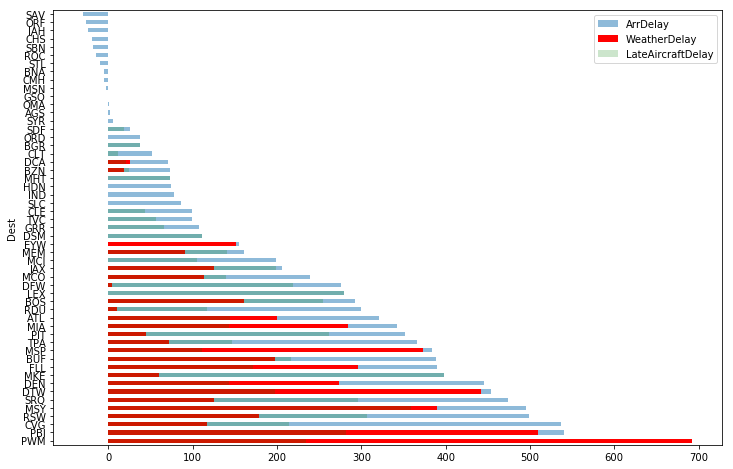

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
x.groupby('Dest', as_index=False).max().sort_values('ArrDelay', ascending=False).plot(x='Dest', y='ArrDelay', kind='barh', ax=ax, alpha=0.5);
x.groupby('Dest', as_index=False).max().sort_values('ArrDelay', ascending=False).plot(x='Dest', y='WeatherDelay', kind='barh', ax=ax, colors='r');
x.groupby('Dest', as_index=False).max().sort_values('ArrDelay', ascending=False).plot(x='Dest', y='LateAircraftDelay', kind='barh', ax=ax, colors='g', alpha=0.2);

In [16]:
# df[df['PerformanceID'] == '2010_01_011979010311348712478N345NB'].sort_values('Obsv_Type').head()

In [17]:
df_exp = df.drop(['Obsv_Type', 'Obsv_Value'], axis=1).sort_values('PerformanceID').drop_duplicates(['PerformanceID']).set_index('PerformanceID').join(df.pivot(index='PerformanceID', columns='Obsv_Type', values='Obsv_Value'))

In [18]:
df_exp.describe()

,FlightNum,DepDelay,DepDelayMinutes,DepDel15,ArrDelay,ArrDelayMinutes,ArrDel15,TaxiOut,TaxiIn,CRSElapsedTime,...,WT08,WT09,WT11,WT13,WT14,WT16,WT17,WT18,WT19,WT22
count,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,...,25734.0,377.0,139.0,18647.0,6231.0,31451.0,62.0,5568.0,133.0,236.0
mean,1729.687893,11.066144,13.664918,0.180403,2.629927,14.135727,0.196664,28.474811,6.863372,166.038104,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,684.386329,43.966608,43.055124,0.384523,47.687712,42.430871,0.397477,14.538544,4.316787,40.502324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,19.000000,-112.000000,0.000000,0.000000,-112.000000,0.000000,0.000000,2.000000,1.000000,55.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1332.000000,-5.000000,0.000000,0.000000,-20.000000,0.000000,0.000000,19.000000,4.000000,149.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1819.000000,-2.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,25.000000,6.000000,176.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,2219.000000,6.000000,6.000000,0.000000,8.000000,8.000000,0.000000,35.000000,8.000000,193.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,7385.000000,1189.000000,1189.000000,1.000000,1191.000000,1191.000000,1.000000,206.000000,186.000000,329.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [19]:
# replace na with 0 for WT** variables
import re

for col in df_exp.columns:
    match = re.fullmatch('^WT\d+$', col)
    if match:
        df_exp.loc[:, col] = df_exp.loc[:, col].fillna(0)

In [20]:
df_exp.isnull().sum(axis=0).sort_values(ascending=False)

FirstDepTime         187947
TotalAddGTime        187947
LongestAddGTime      187947
WESD                 166162
PGTM                 148420
FMTM                 148300
TAVG                  77841
WDF5                    287
WSF5                    287
TaxiOut                   0
ArrDelay                  0
ArrDelayMinutes           0
ArrDel15                  0
WT22                      0
WheelsOff                 0
ArrTimeBlk                0
TaxiIn                    0
Cancelled                 0
Diverted                  0
CRSElapsedTime            0
ActualElapsedTime         0
AirTime                   0
WheelsOn                  0
CRSArrTime                0
ArrTime                   0
Dest                      0
FlightDate                0
Carrier                   0
TailNum                   0
FlightNum                 0
                      ...  
WT04                      0
WT05                      0
WT06                      0
WT07                      0
WT09                

In [21]:
df_exp.describe()

,FlightNum,DepDelay,DepDelayMinutes,DepDel15,ArrDelay,ArrDelayMinutes,ArrDel15,TaxiOut,TaxiIn,CRSElapsedTime,...,WT08,WT09,WT11,WT13,WT14,WT16,WT17,WT18,WT19,WT22
count,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,...,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000,189903.000000
mean,1729.687893,11.066144,13.664918,0.180403,2.629927,14.135727,0.196664,28.474811,6.863372,166.038104,...,0.135511,0.001985,0.000732,0.098192,0.032811,0.165616,0.000326,0.029320,0.000700,0.001243
std,684.386329,43.966608,43.055124,0.384523,47.687712,42.430871,0.397477,14.538544,4.316787,40.502324,...,0.342270,0.044512,0.027045,0.297575,0.178143,0.371737,0.018066,0.168703,0.026455,0.035231
min,19.000000,-112.000000,0.000000,0.000000,-112.000000,0.000000,0.000000,2.000000,1.000000,55.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1332.000000,-5.000000,0.000000,0.000000,-20.000000,0.000000,0.000000,19.000000,4.000000,149.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1819.000000,-2.000000,0.000000,0.000000,-8.000000,0.000000,0.000000,25.000000,6.000000,176.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2219.000000,6.000000,6.000000,0.000000,8.000000,8.000000,0.000000,35.000000,8.000000,193.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7385.000000,1189.000000,1189.000000,1.000000,1191.000000,1191.000000,1.000000,206.000000,186.000000,329.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df_exp.dropna(axis=1, inplace=True)

In [23]:
x = df_exp['CRSArrTime'].iloc[20]
x.minute

31

In [24]:
df_exp = df_exp.join(pd.get_dummies(df_exp['Dest'], prefix='Dest', drop_first=True))

In [25]:
df_exp.head()

,File_Name,FlightDate,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,...,Dest_RSW,Dest_SAV,Dest_SBN,Dest_SDF,Dest_SLC,Dest_SRQ,Dest_STL,Dest_SYR,Dest_TPA,Dest_TVC
PerformanceID,,,,,,,,,,,,,,,,,,,,,
2010_01_011979010141348712953N322US,On_Time_On_Time_Performance_2010_1.zip,2010-01-01,DL,N322US,2115,LGA,New York,New York,MSP,Minneapolis,...,0,0,0,0,0,0,0,0,0,0
2010_01_011979010241320412953N924DL,On_Time_On_Time_Performance_2010_1.zip,2010-01-01,DL,N924DL,1515,LGA,New York,New York,MCO,Orlando,...,0,0,0,0,0,0,0,0,0,0
2010_01_011979010411072112953N906DL,On_Time_On_Time_Performance_2010_1.zip,2010-01-01,DL,N906DL,1376,LGA,New York,New York,BOS,Boston,...,0,0,0,0,0,0,0,0,0,0
2010_01_011979010491169712953N971DL,On_Time_On_Time_Performance_2010_1.zip,2010-01-01,DL,N971DL,1583,LGA,New York,New York,FLL,Fort Lauderdale,...,0,0,0,0,0,0,0,0,0,0
2010_01_011979010551402712953N361NW,On_Time_On_Time_Performance_2010_1.zip,2010-01-01,DL,N361NW,2425,LGA,New York,New York,PBI,West Palm Beach/Palm Beach,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_exp['Year'] = df_exp['FlightDate'].apply(lambda x: x.year)
df_exp['ISO_Weekday'] = df_exp['FlightDate'].apply(lambda x: x.weekday())
df_exp['Day_of_Year'] = df_exp['FlightDate'].apply(lambda x: x.timetuple().tm_yday)
df_exp['ArrHour'] = df_exp['CRSArrTime'].apply(lambda x: x.hour)
df_exp['DepHour'] = df_exp['CRSDepTime'].apply(lambda x: x.hour)
df_exp.head()

,File_Name,FlightDate,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,...,Dest_SRQ,Dest_STL,Dest_SYR,Dest_TPA,Dest_TVC,Year,ISO_Weekday,Day_of_Year,ArrHour,DepHour
PerformanceID,,,,,,,,,,,,,,,,,,,,,
2010_01_011979010141348712953N322US,On_Time_On_Time_Performance_2010_1.zip,2010-01-01,DL,N322US,2115,LGA,New York,New York,MSP,Minneapolis,...,0,0,0,0,0,2010,4,1,10,8
2010_01_011979010241320412953N924DL,On_Time_On_Time_Performance_2010_1.zip,2010-01-01,DL,N924DL,1515,LGA,New York,New York,MCO,Orlando,...,0,0,0,0,0,2010,4,1,10,7
2010_01_011979010411072112953N906DL,On_Time_On_Time_Performance_2010_1.zip,2010-01-01,DL,N906DL,1376,LGA,New York,New York,BOS,Boston,...,0,0,0,0,0,2010,4,1,10,9
2010_01_011979010491169712953N971DL,On_Time_On_Time_Performance_2010_1.zip,2010-01-01,DL,N971DL,1583,LGA,New York,New York,FLL,Fort Lauderdale,...,0,0,0,0,0,2010,4,1,10,7
2010_01_011979010551402712953N361NW,On_Time_On_Time_Performance_2010_1.zip,2010-01-01,DL,N361NW,2425,LGA,New York,New York,PBI,West Palm Beach/Palm Beach,...,0,0,0,0,0,2010,4,1,10,7


In [27]:
dest_cols = []
for col in df_exp.columns:
    match = re.fullmatch('^Dest_[A-Z]+$', col)
    if match:
        dest_cols.append(col)
print(dest_cols)

['Dest_ATL', 'Dest_BGR', 'Dest_BNA', 'Dest_BOS', 'Dest_BUF', 'Dest_BZN', 'Dest_CHS', 'Dest_CLE', 'Dest_CLT', 'Dest_CMH', 'Dest_CVG', 'Dest_DCA', 'Dest_DEN', 'Dest_DFW', 'Dest_DSM', 'Dest_DTW', 'Dest_EYW', 'Dest_FLL', 'Dest_GRR', 'Dest_GSO', 'Dest_HDN', 'Dest_IAH', 'Dest_IND', 'Dest_JAX', 'Dest_LEX', 'Dest_MCI', 'Dest_MCO', 'Dest_MEM', 'Dest_MHT', 'Dest_MIA', 'Dest_MKE', 'Dest_MSN', 'Dest_MSP', 'Dest_MSY', 'Dest_OMA', 'Dest_ORD', 'Dest_ORF', 'Dest_PBI', 'Dest_PIT', 'Dest_PWM', 'Dest_RDU', 'Dest_ROC', 'Dest_RSW', 'Dest_SAV', 'Dest_SBN', 'Dest_SDF', 'Dest_SLC', 'Dest_SRQ', 'Dest_STL', 'Dest_SYR', 'Dest_TPA', 'Dest_TVC']


In [28]:
def delay_category(arrDel):
    if arrDel < 0:
        return "Early"
    elif arrDel < 10:
        return "On Time"
    elif arrDel < 15:
        return "5 ~ 15 Minute Delay"
    elif arrDel < 30:
        return "15 ~ 30 Minute Delay"
    elif arrDel < 60:
        return "30 ~ 60 Minute Delay"
    elif arrDel < 120:
        return "1 ~ 2 Hour Delay"
    elif arrDel < 240:
        return "2 ~ 4 Hour Delay"
    else:
        return "Over 4 Hour Delay"
    
def make_category(arrDel):
    delay = delay_category(arrDel)
    return delay + ' '*(20-len(delay))

In [90]:
def weather_delay_category(weatherDelay):
    if weatherDelay == 0:
        return 0
    else:
        return 1

In [91]:
df_exp['ArrCat'] = df_exp['ArrDelay'].apply(make_category)
df_exp['WeatherDelayCat'] = df_exp['WeatherDelay'].apply(weather_delay_category)

In [103]:
label = df_exp['ArrDel15']
# label = df_exp['ArrCat']
# label = df_exp['WeatherDelayCat']
feature_names = ['CRSElapsedTime', 'Flights', 'Distance', 'AWND', 'Year', 'ISO_Weekday', 
                 'Day_of_Year', 'ArrHour', 'DepHour',
                 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'WDF2', 'WSF2', 'WT01', 'WT02',
                 'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT11', 'WT13',
                 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22']
# feature_names += dest_cols
features = df_exp.loc[:,feature_names]
features.dropna(axis=1, inplace=True)
features.head()

,CRSElapsedTime,Flights,Distance,AWND,Year,ISO_Weekday,Day_of_Year,ArrHour,DepHour,PRCP,...,WT08,WT09,WT11,WT13,WT14,WT16,WT17,WT18,WT19,WT22
PerformanceID,,,,,,,,,,,,,,,,,,,,,
2010_01_011979010141348712953N322US,201.0,1.0,1020.0,26.0,2010,4,1,10,8,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2010_01_011979010241320412953N924DL,185.0,1.0,950.0,26.0,2010,4,1,10,7,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2010_01_011979010411072112953N906DL,82.0,1.0,185.0,26.0,2010,4,1,10,9,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2010_01_011979010491169712953N971DL,198.0,1.0,1076.0,26.0,2010,4,1,10,7,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2010_01_011979010551402712953N361NW,187.0,1.0,1035.0,26.0,2010,4,1,10,7,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [104]:
features.isnull().sum(axis=0).sort_values(ascending=False)

WT22              0
WSF2              0
Flights           0
Distance          0
AWND              0
Year              0
ISO_Weekday       0
Day_of_Year       0
ArrHour           0
DepHour           0
PRCP              0
SNOW              0
SNWD              0
TMAX              0
TMIN              0
WDF2              0
WT01              0
WT19              0
WT02              0
WT03              0
WT04              0
WT05              0
WT06              0
WT07              0
WT08              0
WT09              0
WT11              0
WT13              0
WT14              0
WT16              0
WT17              0
WT18              0
CRSElapsedTime    0
dtype: int64

In [105]:
label.head()

PerformanceID
2010_01_011979010141348712953N322US    0.0
2010_01_011979010241320412953N924DL    0.0
2010_01_011979010411072112953N906DL    0.0
2010_01_011979010491169712953N971DL    1.0
2010_01_011979010551402712953N361NW    1.0
Name: ArrDel15, dtype: float64

In [106]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, accuracy_score, classification_report

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
from collections import Counter
Counter(y_train.values)

Counter({0.0: 106712, 1.0: 26220})

In [110]:
clf = RandomForestClassifier(n_estimators=50)
# clf = LinearSVC()
# clf = AdaBoostClassifier(base_estimator=RandomForestClassifier())
# clf = SVC()
# clf = LogisticRegression()
# clf = GaussianNB()

In [111]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [112]:
y_pred = clf.predict(X_test)

In [113]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred))

Precision: 0.672829361819
Recall: 0.441538599802
Accuracy: 0.848993347493

             precision    recall  f1-score   support

        0.0       0.87      0.95      0.91     45844
        1.0       0.67      0.44      0.53     11127

avg / total       0.84      0.85      0.84     56971



In [158]:
def get_scores(y_test, y_pred):
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    return ', '.join([str(accuracy_score(y_test, y_pred)),
                      str(recall_score(y_test, y_pred)),
                      str(precision_score(y_test, y_pred))])

def test_classifiers(X, y, scale_values=True):
    from sklearn.cross_validation import train_test_split
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.learning_curve import learning_curve
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.cross_validation import cross_val_score
    from IPython.display import clear_output
    from sklearn.preprocessing import StandardScaler

    print("Loading Data...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 4444)
    print("Scaling Data...")
    if scale_values:
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

    score = []
    nn = []
    for i in range(1,10,3):
        clear_output(wait=True)
        print('Training/Testing KNN: %d/%d' % (i, 10))
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        score.append(accuracy_score(y_test, knn.predict(X_test)))
        nn.append(i)

    plt.plot(nn, score)
    plt.title('KNN Accuracy by Nearest Neighbors')
    plt.ylabel('Accuracy')
    plt.xlabel('Nearest Neighbors');
    print('Best KNN Accuracy: ' + str(max(score)))
    print('Best NN value: ' + str(nn[score.index(max(score))]))

    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_score = (get_scores(y_test, lr.predict(X_test)))
    print('LogReg Accuracy: ' + str(lr_score))

    nb = GaussianNB()
    nb.fit(X_train, y_train)
    nb_score = (get_scores(y_test, nb.predict(X_test)))
    print('GaussianNB Accuracy: ' + str(nb_score))

#     svc = SVC()
#     svc.fit(X_train, y_train)
#     svc_score = (accuracy_score(y_test, svc.predict(X_test)))
#     print('SVC Accuracy: ' + str(svc_score))

    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    dtc_score = (get_scores(y_test, dtc.predict(X_test)))
    print('Decision Tree Accuracy: ' + str(dtc_score))

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    rf_score = (get_scores(y_test, rf.predict(X_test)))
    print('Random Forest Accuracy: ' + str(rf_score))

#     knn_cv = np.mean(cross_val_score(knn, X, y, ))
#     print('KNN CV Score: ' + str(knn_cv))

    lr_cv = np.mean(cross_val_score(lr, X, y))
    print('LogReg CV Score: ' + str(lr_cv))

    nb_cv = np.mean(cross_val_score(nb, X, y))
    print('GaussianNB CV Score: ' + str(nb_cv))

    svc_cv = np.mean(cross_val_score(svc, X, y))
    print('SVC CV Score: ' + str(svc_cv))

    dtc_cv = np.mean(cross_val_score(dtc, X, y))
    print('Decision Tree CV Score: ' + str(dtc_cv))

    rf_cv = np.mean(cross_val_score(rf, X, y))
    print('Random Forest CV Score: ' + str(rf_cv))

In [159]:
test_classifiers(features, label)

Loading Data...
Scaling Data...
LogReg Accuracy: 0.809552228327, 0.0999024044007, 0.614964500273
GaussianNB Accuracy: 0.770690351231, 0.225623280987, 0.369675824975
Decision Tree Accuracy: 0.77990556599, 0.472362700736, 0.44679422625
Random Forest Accuracy: 0.840269610855, 0.405554076834, 0.655716539951
LogReg CV Score: 0.809165731979
GaussianNB CV Score: 0.756918005508
Decision Tree CV Score: 0.698530302312
Random Forest CV Score: 0.791303981506


In [147]:
# Baseline
y_base = [1]*len(y_pred)
print("Precision:", precision_score(y_test, y_base))
print("Recall:", recall_score(y_test, y_base))
print("Accuracy:", accuracy_score(y_test, y_base))
print(confusion_matrix(y_test, y_base))

Precision: 0.195309894508
Recall: 1.0
Accuracy: 0.195309894508
[[    0 45844]
 [    0 11127]]


In [148]:
# Random Guessing
y_guess = [int(i) for i in (np.random.randn(len(y_pred)) < 0.5)]
print("Precision:", precision_score(y_test, y_guess))
print("Recall:", recall_score(y_test, y_guess))
print("Accuracy:", accuracy_score(y_test, y_guess))
print(confusion_matrix(y_test, y_guess))

Precision: 0.197027633323
Recall: 0.694616698122
Accuracy: 0.387460286813
[[14345 31499]
 [ 3398  7729]]


In [142]:
len(features)

189903